# Pretty Good Oscillator (PGO)

https://library.tradingtechnologies.com/trade/chrt-ti-pretty-good-oscillator.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735313,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


In [3]:
n = 14
df['SMA'] = df['Adj Close'].rolling(n).mean()
df['EMA'] = df['Adj Close'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

In [4]:
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Adj Close'].shift())
df['LC'] = abs(df['Low'] - df['Adj Close'].shift())
df['TR'] = df[['HL','HC','LC']].max(axis=1)
df['ATR'] = df['TR'].rolling(n).mean()
df = df.drop(['HL','HC','LC','TR'],axis=1)

In [5]:
df['PGO'] = (df['Adj Close'] - df['SMA']) / df['ATR']

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,ATR,PGO
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735313,146322800,NaN,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,NaN,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,NaN,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,138.149784,137.291821,4.388695,-1.478982
2022-12-27 00:00:00-05:00,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,137.231186,136.297148,4.214336,-1.755772
2022-12-28 00:00:00-05:00,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,136.168522,134.903909,4.342193,-2.376833


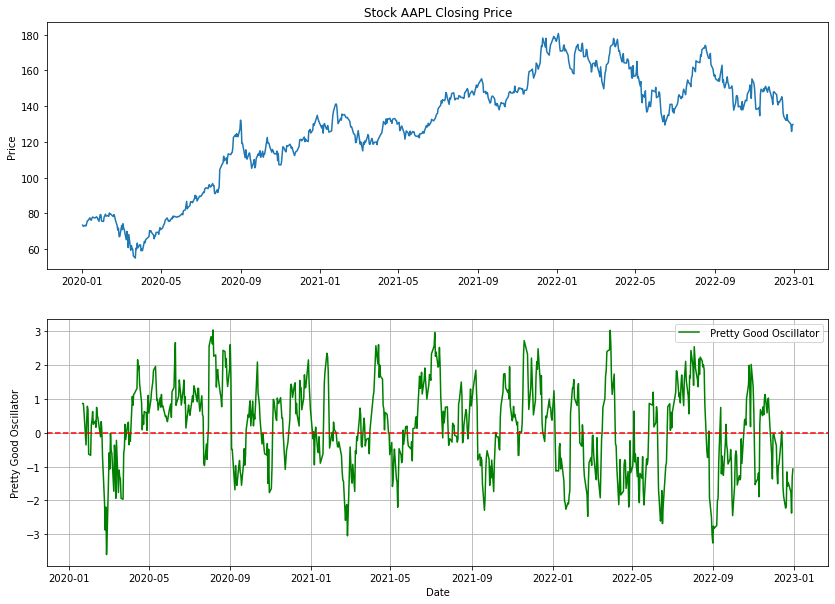

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PGO'], label=' Pretty Good Oscillator', color='green')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Pretty Good Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Pretty Good Oscillator (PGO)

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,ATR,PGO,VolumePositive
0,18263.208333,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,NaN,NaN,NaN,NaN,False
1,18264.208333,74.287498,75.144997,74.125000,74.357498,72.735313,146322800,NaN,NaN,NaN,NaN,False
2,18267.208333,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,NaN,NaN,NaN,NaN,False
3,18268.208333,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,NaN,NaN,NaN,NaN,False
4,18269.208333,74.290001,76.110001,74.290001,75.797501,74.143906,132079200,NaN,NaN,NaN,NaN,False


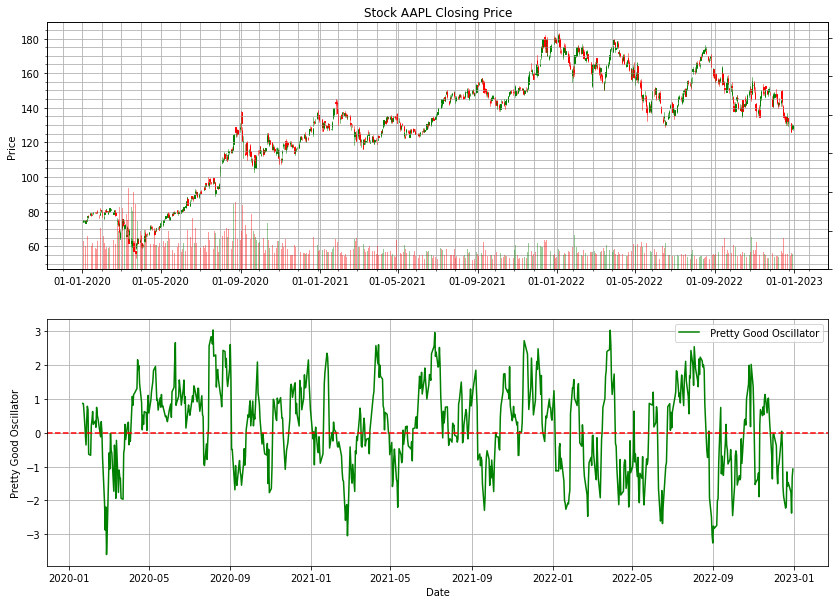

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PGO'], label=' Pretty Good Oscillator', color='green')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Pretty Good Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')